In [ ]:
####SKIP THIS AFTER RESTART#

# Install required dependencies
#!pip install -r requirements.txt

# Upgrade necessary packages
!pip install --upgrade langchain-core langsmith albumentations wandb google-genai
!pip install --upgrade "pydantic>=2.9.2" wandb langchain google-genai
!pip install datasets
!pip install fsspec==2024.9.0

# Ensure a clean installation of wandb with the desired version
!pip uninstall -y wandb
!pip install --upgrade wandb==0.19.6


! pip install tqdm pandas llama-index
! pip install llama-index-embeddings-openai

# Check for package conflicts
#!pip check


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.3/414.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.3/335.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.7/137.7 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.9
    Uninstalling langsmith-0.3.9:
      Successfully uninstalled langsmith-0.3.9
  Attempting uninstall: google-genai
    Found existing installation: google-genai 0.8.0
    Uninstalling google-genai-0.8.0:
      Successfully uninstalled google-genai-0.8.0
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.37
    Uninstalling langchain-core-0.3.37:
      Successfully uninstalled langchain-core-0.3.37


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_syst

In [ ]:
# Clone necessary repositories
!git clone https://github.com/jerryjliu/llama_index.git
!git clone https://github.com/run-llama/finetune-embedding.git

# Navigate to finetune-embedding directory
%cd finetune-embedding

Cloning into 'llama_index'...
remote: Enumerating objects: 115824, done.
remote: Counting objects: 100% (6542/6542), done.
remote: Compressing objects: 100% (459/459), done.
remote: Total 115824 (delta 6205), reused 6089 (delta 6082), pack-reused 109282 (from 3)
Receiving objects: 100% (115824/115824), 257.39 MiB | 17.36 MiB/s, done.
Resolving deltas: 100% (80457/80457), done.
Updating files: 100% (11789/11789), done.
Cloning into 'finetune-embedding'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 110 (delta 54), reused 83 (delta 34), pack-reused 0 (from 0)
Receiving objects: 100% (110/110), 784.00 KiB | 13.75 MiB/s, done.
Resolving deltas: 100% (54/54), done.
/content/finetune-embedding


In [ ]:
from pydantic import BaseModel
import wandb
import numpy as np
import openai

In [ ]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

print("CUDA Available:", torch.cuda.is_available())
print("Device Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU only")

CUDA Available: True
Device Name: Tesla T4


### Load pretrained model

In [ ]:
from google.colab import files
uploaded = files.upload()  # Select the saved files

Saving train_dataset.json to train_dataset (1).json
Saving val_dataset.json to val_dataset (1).json


In [ ]:
import sqlite3

# Connect to the database
db_path = "/content/SwitchItUp(1).db"  # Ensure this is the correct path
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Fetch all table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [table[0] for table in cursor.fetchall()]

# Loop through all tables and retrieve their schema
for table_name in tables:
    cursor.execute(f"PRAGMA table_info({table_name})")
    schema = cursor.fetchall()

    print(f"\n📌 Schema of {table_name}:")
    for col in schema:
        print(col)

# Close the connection
conn.close()


# Fine-tuning

In [ ]:
!pip install --upgrade huggingface_hub sentence-transformers
!pip install sentence-transformers torch --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.0/468.0 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
model_id = "BAAI/bge-small-en"
model = SentenceTransformer(model_id)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': True}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': True, 'pooling_mode_mean_tokens': False, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

### Define dataloader

In [ ]:
import json

from torch.utils.data import DataLoader
from sentence_transformers import InputExample

In [ ]:
TRAIN_DATASET_FPATH = './train_dataset.json'
VAL_DATASET_FPATH = './val_dataset.json'

# We use a very small batchsize to run this toy example on a local machine.
# This should typically be much larger.
BATCH_SIZE = 10

In [ ]:
with open(TRAIN_DATASET_FPATH, 'r+') as f:
    train_dataset = json.load(f)

with open(VAL_DATASET_FPATH, 'r+') as f:
    val_dataset = json.load(f)

In [ ]:
dataset = train_dataset

corpus = dataset['corpus']
queries = dataset['queries']
relevant_docs = dataset['relevant_docs']

examples = []
for query_id, query in queries.items():
    node_id = relevant_docs[query_id][0]
    text = corpus[node_id]
    example = InputExample(texts=[query, text])
    examples.append(example)

In [ ]:
loader = DataLoader(
    examples, batch_size=BATCH_SIZE
)

### Define loss

**MultipleNegativesRankingLoss** is a great loss function if you only have positive pairs, for example, only pairs of similar texts like pairs of paraphrases, pairs of duplicate questions, pairs of (query, response), or pairs of (source_language, target_language).

This loss function works great to train embeddings for retrieval setups where you have positive pairs (e.g. (query, relevant_doc)) as it will sample in each batch n-1 negative docs randomly.

The performance usually increases with increasing batch sizes.

For more detals, see:
* [docs](https://www.sbert.net/docs/package_reference/losses.html)
* [paper](

In [ ]:
from sentence_transformers import losses

In [ ]:
loss = losses.MultipleNegativesRankingLoss(model)

### Define evaluator

We setup an evaluator with our val split of the dataset to monitor how well the embedding model is performing during training.

In [ ]:
from sentence_transformers.evaluation import InformationRetrievalEvaluator

In [ ]:
dataset = val_dataset

corpus = dataset['corpus']
queries = dataset['queries']
relevant_docs = dataset['relevant_docs']

evaluator = InformationRetrievalEvaluator(queries, corpus, relevant_docs)

### Run training

The training loop is very straight forward to steup thanks to sentencetransformers' high-level model training API.
All we need to do is plugging in the data loader, loss function, and evaluator that we defined in the previous cells (along with a couple of additional minor settings).

In [ ]:
# We train the model for very few epochs in this toy example.
# This should typically be higher for better performance.
EPOCHS = 10

In [ ]:
warmup_steps = int(len(loader) * EPOCHS * 0.1)

model.fit(
    train_objectives=[(loader, loss)],
    epochs=EPOCHS,
    warmup_steps=warmup_steps,
    output_path='exp_finetune',
    show_progress_bar=True,
    evaluator=evaluator,
    evaluation_steps=50,
)

# Modify Prompts for Better LLM Output Formatting

In [ ]:
!pip install rank_bm25

In [ ]:
!pip install ace_tools

In [ ]:
import sqlite3
import numpy as np
import datetime
from collections import deque
from torch.utils.data import DataLoader
from sentence_transformers import SentenceTransformer, InputExample, losses
from sentence_transformers.evaluation import InformationRetrievalEvaluator
from rank_bm25 import BM25Okapi
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:


### Function to Hash Email (for Additional Security)
import hashlib

def hash_email(email: str) -> str:
    return hashlib.sha256(email.encode()).hexdigest()

### Retrieve Relevant Schema Information
def retrieve_schema_info(db_path="/content/SwitchItUp(1).db"):
    """
    Retrieves the full schema of the database, including table names and their columns.
    """
    try:
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()

        # Fetch all table names
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = [table[0] for table in cursor.fetchall()]

        schema_info = ""

        for table in tables:
            cursor.execute(f"PRAGMA table_info({table})")
            columns = [col[1] for col in cursor.fetchall()]
            schema_info += f"Table: {table} | Columns: {', '.join(columns)}\n"

        conn.close()

        if not schema_info.strip():
            raise ValueError("❌ Error: No schema information found. Ensure your database contains tables.")

        return schema_info

    except Exception as e:
        return f"❌ Error retrieving schema: {e}"

### Function to Generate SQL Query
def generate_sql_query(user_query, db_path="/content/SwitchItUp(1).db"):
    """
    Uses OpenAI's LLM to generate an SQL query based on user request and schema.
    """
    # Prevent fetching emails
    if "email" in user_query.lower():
        return "Emails cannot be displayed for security reasons."

    schema_info = retrieve_schema_info(db_path)  # Get schema first

    # Debugging: Ensure schema is being used
    print("\n📌 Using Schema for Query Generation:\n", schema_info)

    if "❌ Error" in schema_info:
        raise ValueError("❌ Schema retrieval failed. Cannot generate SQL.")

    formatted_prompt = f"""
    You are an expert SQL assistant. Given the following database schema, generate an accurate SQL query.

    **Database Schema:**
    {schema_info}

    **User Query:**
    {user_query}

    **SQL Query:**
    ```sql
    [Provide only the SQL query, no explanations.]
    ```
    """

    client = openai.OpenAI(api_key=OPENAI_API_KEY)

    response = client.chat.completions.create(
        model="gpt-4",
        messages=[{"role": "system", "content": "You are an expert SQL assistant."},
                  {"role": "user", "content": formatted_prompt}],
        max_tokens=200,
        temperature=0.8
    )

    sql_query = response.choices[0].message.content.strip()

    # Debugging: Print the generated SQL query before executing
    print("\n📌 Generated SQL Query:\n", sql_query)

    return sql_query

### Function to Execute SQL Query on Database
def execute_sql_query(sql_query, db_path="/content/SwitchItUp(1).db"):
    """
    Executes the generated SQL query on the specified database and returns results.
    """
    try:
        # Prevent execution if the query contains 'email'
        if "email" in sql_query.lower():
            print("Emails cannot be displayed for security reasons.")
            return

        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()
        sql_query = sql_query.strip("```sql").strip("```").strip()
        cursor.execute(sql_query)

        # Fetch results only for SELECT queries
        results = cursor.fetchall()
        conn.commit()  # Commit changes for INSERT/UPDATE/DELETE queries

        # Check if results exist before processing DataFrame
        if results and cursor.description:
            df = pd.DataFrame(results, columns=[desc[0] for desc in cursor.description])
            display(df)  # Works in Google Colab
        else:
            print("Query executed successfully, but no results to display.")

        conn.close()

    except Exception as e:
        print(f"SQL Execution Error: {e}")


In [ ]:
import hashlib
def hash_sensitive_data(data):
    return hashlib.sha256(data.encode()).hexdigest() if data else None

# Connect to SQLite database
conn = sqlite3.connect('/content/SwitchItUp(1).db')
cursor = conn.cursor()

# Select all emails from the user table
cursor.execute("SELECT User_id, email FROM Users")
rows = cursor.fetchall()

# Update each email with its hashed version
for User_id, email in rows:
    if email:  # Ensure email is not NULL
        hashed_email = hash_sensitive_data(email)
        cursor.execute("UPDATE Users SET email = ? WHERE User_id = ?", (hashed_email, User_id))

# Commit and close the connection
conn.commit()

In [ ]:
# Run and verify the schema
schema_info = retrieve_schema_info()
print("\n📌 Retrieved Schema:\n", schema_info)


📌 Retrieved Schema:
 Table: Users | Columns: User_id, first_name, last_name, email, Address, Gender
Table: sqlite_sequence | Columns: name, seq
Table: Listings | Columns: Listing_id, Sold_by, Location, Condition, Selling_Format, Shipping_Cost, Item_Cost, Item_Age, Images, Availability, Posted_on, Category, Product_Description, Listing_header
Table: Audit | Columns: Audit_id, Listing_id, Sold_by, Sold_to, Sold_on, price, Rating
Table: Messages | Columns: Message_id, Sender, Receiver, Listing_id, Message_content, Sent_on
Table: Item_category | Columns: Item_id, Category, Description



In [ ]:
# Load validation dataset
VAL_DATASET_FPATH = './val_dataset.json'
with open(VAL_DATASET_FPATH, 'r') as f:
    val_dataset = json.load(f)

corpus = val_dataset['corpus']
queries = val_dataset['queries']
relevant_docs = val_dataset['relevant_docs']

In [ ]:
# Load models
model_finetuned = SentenceTransformer('exp_finetune')
model_baseline = SentenceTransformer('BAAI/bge-small-en')

In [ ]:
import openai
import os
import torch

# Ensure API key is explicitly passed
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")  # Fetch from environment variables if set up API keys
if not OPENAI_API_KEY:
    OPENAI_API_KEY = ""  # Replace with your actual API key


In [ ]:
from rank_bm25 import BM25Okapi
import numpy as np

# Ensure corpus_texts is properly defined
corpus_texts = list(corpus.values())  # Extract document texts from corpus

# Tokenize corpus for BM25
tokenized_corpus = [doc.split() for doc in corpus_texts]  # Tokenize text
bm25 = BM25Okapi(tokenized_corpus)  # Initialize BM25 model

# Encode corpus for dense retrieval
corpus_embeddings = model_finetuned.encode(corpus_texts, convert_to_tensor=True)

In [ ]:
corpus_ids = list(corpus.keys())  # Define corpus_ids before using it

# Hybrid Search Function
def hybrid_search(query, top_k=5, bm25_weight=0.4):
    """
    Performs a hybrid search by combining dense embeddings with BM25 keyword search.
    - BM25 weight controls the contribution of keyword-based relevance.
    - Embedding similarity ranks documents based on dense vector similarity.
    """
    # BM25 keyword retrieval
    bm25_scores = bm25.get_scores(query.split())
    bm25_ranked = np.argsort(bm25_scores)[::-1][:top_k]  # Get top BM25 results

    # Dense embedding retrieval
    query_embedding = model_finetuned.encode(query, convert_to_tensor=True)
    cosine_scores = torch.nn.functional.cosine_similarity(query_embedding, corpus_embeddings, dim=1)
    dense_ranked = torch.argsort(cosine_scores, descending=True)[:top_k]

    # Combine Scores with Weighted Ranking
    combined_scores = {}
    for i in range(top_k):
        doc_id_bm25 = corpus_ids[bm25_ranked[i]]
        doc_id_dense = corpus_ids[dense_ranked[i].item()]

        # Weighted scoring
        combined_scores[doc_id_bm25] = bm25_scores[bm25_ranked[i]] * bm25_weight + cosine_scores[bm25_ranked[i]].item() * (1 - bm25_weight)
        combined_scores[doc_id_dense] = bm25_scores[dense_ranked[i].item()] * bm25_weight + cosine_scores[dense_ranked[i].item()].item() * (1 - bm25_weight)

    # Sort final ranking
    sorted_results = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)

    return sorted_results[:top_k]

In [ ]:
user_query = input("Enter your SQL query request: ")

Enter your SQL query request: whats the email of user 12


In [ ]:
# Retrieve schema
schema_info = retrieve_schema_info(user_query)

# Generate SQL Query
sql_query = generate_sql_query(user_query)

print("\nGenerated SQL Query:\n", sql_query)

# Execute the SQL query
execute_sql_query(sql_query)


Generated SQL Query:
 Emails cannot be displayed for security reasons.
Emails cannot be displayed for security reasons.


In [ ]:
test_query = "SELECT COUNT(User_id) FROM Users;"
execute_sql_query(test_query)  # Does this run without errors?

,COUNT(User_id)
0,1500


In [ ]:
sql_query = generate_sql_query(user_query)
print("Generated SQL Query (Raw):", repr(sql_query))  # Check for hidden formatting


Generated SQL Query (Raw): 'Emails cannot be displayed for security reasons.'


# Custom Evaluation

In this notebook, we evaluate 3 different embedding models:
1. proprietary OpenAI embedding,
2. open source `BAAI/bge-small-en`, and
3. our finetuned embedding model.

We consider 2 evaluation approaches:
1. a simple custom **hit rate** metric
2. using `InformationRetrievalEvaluator` from sentence_transformers

We show that finetuning on synthetic (LLM-generated) dataset significantly improve upon an opensource embedding model.

In [ ]:
# import torch
# from sentence_transformers import SentenceTransformer
# from sentence_transformers.evaluation import InformationRetrievalEvaluator

In [ ]:
def encode_with_openai(texts):
    """Obtain embeddings using OpenAI's API with explicit API key."""
    client = openai.OpenAI(api_key=OPENAI_API_KEY)  # Pass API key directly
    response = client.embeddings.create(
        input=texts,
        model="text-embedding-ada-002"
    )
    return [item.embedding for item in response.data]


def compute_hit_rate(model, queries, corpus, relevant_docs):
    """Compute the hit rate metric."""
    query_embeddings = model.encode(list(queries.values()), convert_to_tensor=True)
    corpus_embeddings = model.encode(list(corpus.values()), convert_to_tensor=True)

    corpus_ids = list(corpus.keys())
    corpus_embeddings = {corpus_ids[i]: corpus_embeddings[i] for i in range(len(corpus_ids))}

    hit_count = 0
    for i, (query_id, query_emb) in enumerate(zip(queries.keys(), query_embeddings)):
        scores = {doc_id: torch.cosine_similarity(query_emb, doc_emb, dim=0).item() for doc_id, doc_emb in corpus_embeddings.items()}
        sorted_docs = sorted(scores, key=scores.get, reverse=True)
        if relevant_docs[query_id][0] in sorted_docs[:5]:  # Top-5 retrieval
            hit_count += 1

    return hit_count / len(queries)

In [ ]:
# Evaluate models
print("Evaluating fine-tuned model...")
hit_rate_finetuned = compute_hit_rate(model_finetuned, queries, corpus, relevant_docs)
evaluator = InformationRetrievalEvaluator(queries, corpus, relevant_docs)
retrieval_score_finetuned = evaluator(model_finetuned)

print("Evaluating baseline model...")
hit_rate_baseline = compute_hit_rate(model_baseline, queries, corpus, relevant_docs)
retrieval_score_baseline = evaluator(model_baseline)

Evaluating fine-tuned model...
Evaluating baseline model...


In [ ]:
# OpenAI embedding evaluation
print("Evaluating OpenAI embedding...")
openai_query_embeddings = encode_with_openai(list(queries.values()))
openai_corpus_embeddings = encode_with_openai(list(corpus.values()))

openai_corpus_ids = list(corpus.keys())
openai_corpus_embeddings = {openai_corpus_ids[i]: torch.tensor(openai_corpus_embeddings[i]) for i in range(len(openai_corpus_ids))}

hit_count_openai = 0
for i, (query_id, query_emb) in enumerate(zip(queries.keys(), openai_query_embeddings)):
    scores = {doc_id: torch.cosine_similarity(torch.tensor(query_emb), doc_emb, dim=0).item() for doc_id, doc_emb in openai_corpus_embeddings.items()}
    sorted_docs = sorted(scores, key=scores.get, reverse=True)
    if relevant_docs[query_id][0] in sorted_docs[:5]:
        hit_count_openai += 1

hit_rate_openai = hit_count_openai / len(queries)

Evaluating OpenAI embedding...


In [ ]:
# Print results
print("Performance Metrics:")
print(f"Fine-tuned Model Hit Rate: {hit_rate_finetuned:.4f}")
print(f"Fine-tuned Model NDCG@10: {retrieval_score_finetuned['cosine_ndcg@10']:.4f}")
print(f"Fine-tuned Model MRR@10: {retrieval_score_finetuned['cosine_mrr@10']:.4f}")
print(f"Fine-tuned Model MAP@100: {retrieval_score_finetuned['cosine_map@100']:.4f}")

print(f"Baseline Model Hit Rate: {hit_rate_baseline:.4f}")
print(f"Baseline Model NDCG@10: {retrieval_score_baseline['cosine_ndcg@10']:.4f}")
print(f"Baseline Model MRR@10: {retrieval_score_baseline['cosine_mrr@10']:.4f}")
print(f"Baseline Model MAP@100: {retrieval_score_baseline['cosine_map@100']:.4f}")

print(f"OpenAI Embedding Hit Rate: {hit_rate_openai:.4f}")

Performance Metrics:
Fine-tuned Model Hit Rate: 0.8480
Fine-tuned Model NDCG@10: 0.7538
Fine-tuned Model MRR@10: 0.7099
Fine-tuned Model MAP@100: 0.7143
Baseline Model Hit Rate: 0.7374
Baseline Model NDCG@10: 0.6522
Baseline Model MRR@10: 0.6006
Baseline Model MAP@100: 0.6072
OpenAI Embedding Hit Rate: 0.8807


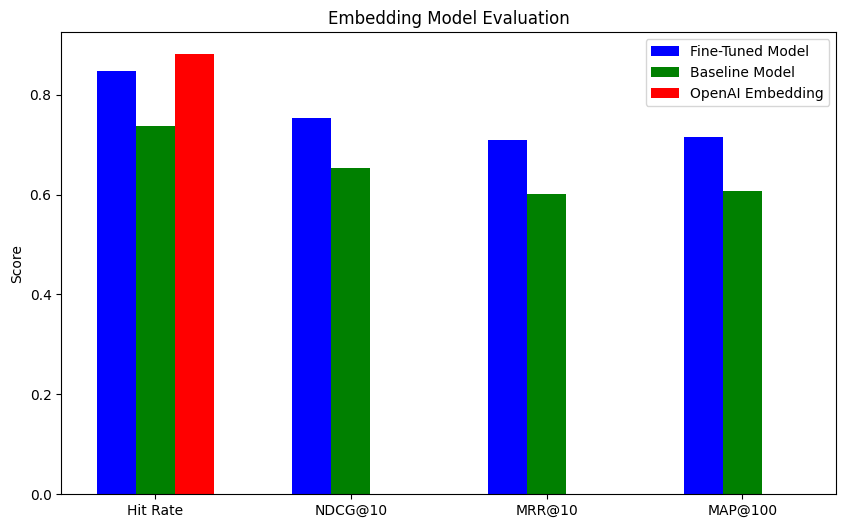

In [ ]:
metrics = ["Hit Rate", "NDCG@10", "MRR@10", "MAP@100"]
fine_tuned_scores = [
    hit_rate_finetuned,
    retrieval_score_finetuned["cosine_ndcg@10"],
    retrieval_score_finetuned["cosine_mrr@10"],
    retrieval_score_finetuned["cosine_map@100"]
]

baseline_scores = [
    hit_rate_baseline,
    retrieval_score_baseline["cosine_ndcg@10"],
    retrieval_score_baseline["cosine_mrr@10"],
    retrieval_score_baseline["cosine_map@100"]
]


openai_scores = [hit_rate_openai if hit_rate_openai is not None else 0.0] + ["N/A"] * 3

plt.figure(figsize=(10, 6))
x = np.arange(len(metrics))

plt.bar(x - 0.2, fine_tuned_scores, 0.2, label="Fine-Tuned Model", color='blue')
plt.bar(x, baseline_scores, 0.2, label="Baseline Model", color='green')

if hit_rate_openai is not None:
    plt.bar(x + 0.2, [hit_rate_openai] + [0] * 3, 0.2, label="OpenAI Embedding", color='red')

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Embedding Model Evaluation")
plt.legend()
plt.show()

Reference:

https://docs.llamaindex.ai/en/stable/use_cases/q_and_a/

https://docs.llamaindex.ai/en/stable/optimizing/fine-tuning/fine-tuning/